In [1]:
# importing packages

In [2]:
import pandas as pd 
import numpy as np

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\saura\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from xgboost import XGBClassifier

In [6]:
# importing dataset

In [7]:
train=pd.read_csv('F:/Titanic/train.csv')

In [8]:
# Data intertpretation and missing value treatment

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.shape

(891, 12)

In [11]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
train['relatives']= train['SibSp'] + train['Parch']
train.loc[train['relatives'] > 0, 'not_alone'] = 0
train.loc[train['relatives'] == 0, 'not_alone'] = 1
train['not_alone'] = train['not_alone'].astype(int) 

In [14]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}


train['Deck'] = train['Cabin'].fillna("U")
train['Deck'] = train['Cabin'].astype(str).str[0] 
train['Deck'] = train['Deck'].str.capitalize()
train['Deck'] = train['Deck'].map(deck)
train['Deck'] = train['Deck'].fillna(0)
train['Deck'] = train['Deck'].astype(int) 


In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,3


In [16]:
train['Age_grp']=np.where((train.Age<=5),0,np.where(((train.Age>5) &(train.Age<=11)),1,
                                                   np.where(((train.Age>11) &(train.Age<=23)),2,
                                                            np.where(((train.Age>23) &(train.Age<=47)),
                                                            3,4))))

In [17]:
train.Age_grp.value_counts()

3    379
4    266
2    178
0     44
1     24
Name: Age_grp, dtype: int64

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck,Age_grp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,2,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0,0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,3,3


In [19]:
train.drop(columns=['Name','Ticket','Fare','SibSp','Parch','relatives','Cabin','Age'],inplace=True)

In [20]:
train.dropna(axis=0,inplace=True)

In [21]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [22]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [23]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Embarked       0
not_alone      0
Deck           0
Age_grp        0
dtype: int64

In [24]:
train=create_dummies(train,['Sex','Embarked'])

In [25]:
train.head(10)

,PassengerId,Survived,Pclass,not_alone,Deck,Age_grp,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,0,0,2,1,0,1
1,2,1,1,0,3,3,0,0,0
2,3,1,3,1,0,3,0,0,1
3,4,1,1,0,3,3,0,0,1
4,5,0,3,1,0,3,1,0,1
5,6,0,3,1,0,4,1,1,0
6,7,0,1,1,5,4,1,0,1
7,8,0,3,0,0,0,1,0,1
8,9,1,3,0,0,3,0,0,1
9,10,1,2,0,0,2,0,0,0


In [26]:
train.corr()

,PassengerId,Survived,Pclass,not_alone,Deck,Age_grp,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,0.057649,-0.000485,0.025430,0.043136,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.206207,0.286459,-0.112150,-0.541585,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,0.138553,-0.569933,-0.140129,0.127741,0.220558,0.076466
not_alone,0.057649,-0.206207,0.138553,1.000000,-0.157508,0.274714,0.306985,0.087099,0.027982
Deck,-0.000485,0.286459,-0.569933,-0.157508,1.000000,0.027014,-0.141557,-0.107076,-0.038606
Age_grp,0.025430,-0.112150,-0.140129,0.274714,0.027014,1.000000,0.095553,0.160939,-0.149616
Sex_male,0.043136,-0.541585,0.127741,0.306985,-0.141557,0.095553,1.000000,-0.075217,0.121405
Embarked_Q,-0.033694,0.004536,0.220558,0.087099,-0.107076,0.160939,-0.075217,1.000000,-0.499261
Embarked_S,0.022269,-0.151777,0.076466,0.027982,-0.038606,-0.149616,0.121405,-0.499261,1.000000


In [27]:
feature_columns=train.columns.difference(['PassengerId','Survived'])

In [28]:
# train test split

In [29]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( train[feature_columns],
                                                  train['Survived'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [30]:
# model fitting to find best tuning parameters & training using Random forest algorithm 

In [31]:
pargrid_rf = {'n_estimators': [ 5,10,20,30,40,60, 70, 80,90,100],
                  'max_features': [2,3,4,5,6,7],
             'max_depth':[4,5,6,7,8,9,10]}


gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X,train_y)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 724 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2324 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3424 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  3.8min finished


In [32]:
gscv_results.best_params_

{'max_depth': 4, 'max_features': 4, 'n_estimators': 30}

In [33]:
gscv_rf.best_score_

0.8312339989759344

In [34]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=30, max_features=4, n_jobs=-1,max_depth= 4)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=4, max_features=4, n_estimators=30, n_jobs=-1,
                       oob_score=True)

In [35]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [36]:
radm_test_pred.head(20)

,actual,predicted
173,0,0
525,0,0
453,1,0
171,0,0
883,0,0
398,0,0
162,0,0
41,0,1
686,0,0
567,0,0


In [37]:
# accuracy testing on test dataset

In [38]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.8014981273408239
0.7677253017696003


C:\Users\saura\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

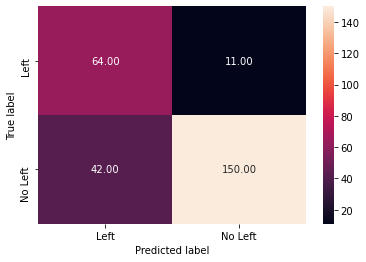

In [39]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [40]:
# model training XG boost Classifier algorithm 

In [41]:
pargrid_xgbm = {'n_estimators': [50,100,200, 250, 300, 400],
               'learning_rate': [10 ** x for x in range(-3, 3)],
               'max_depth':[4,5,6,7,8,9,10]
               }

In [42]:
#from sklearn.model_selection import GridSearchCV
gscv_xgbm = GridSearchCV(estimator=XGBClassifier(), 
                        param_grid=pargrid_xgbm, 
                        cv=10,
                        verbose=True, n_jobs=-1)

In [43]:
gscv_xgbm.fit(train_X, train_y)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2400 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2513 out of 2520 | elapsed:  1.9min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:  1.9min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [44]:
gscv_xgbm.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 250}

In [45]:
xgbm = gscv_xgbm.best_estimator_

In [46]:
gscv_xgbm.best_score_

0.8280337941628263

In [47]:
xgbm.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
xgb_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': xgbm.predict( test_X ) } )

In [49]:
xgb_test_pred.head(20)

,actual,predicted
173,0,0
525,0,0
453,1,0
171,0,0
883,0,0
398,0,0
162,0,0
41,0,1
686,0,0
567,0,0


In [50]:
# accuracy check

In [51]:
print(metrics.accuracy_score(test_y,xgbm.predict(test_X)))
print(metrics.roc_auc_score(test_y,xgbm.predict(test_X)))

0.7677902621722846
0.7333294269307395


C:\Users\saura\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

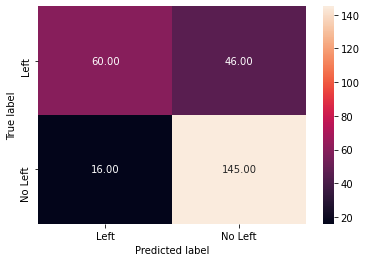

In [52]:
tree_cm = metrics.confusion_matrix( test_y,xgbm.predict(test_X),
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [53]:
# data interpretation and missing value treatent on the given test dataset

In [54]:
test=pd.read_csv('F:/titanic/test.csv')

In [55]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
test.shape

(418, 11)

In [57]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [58]:
test['relatives']= test['SibSp'] + test['Parch']
test.loc[test['relatives'] > 0, 'not_alone'] = 0
test.loc[test['relatives'] == 0, 'not_alone'] = 1
test['not_alone'] = test['not_alone'].astype(int) 

In [59]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}


test['Deck'] = test['Cabin'].fillna("U")
test['Deck'] = test['Cabin'].astype(str).str[0] 
test['Deck'] = test['Deck'].str.capitalize()
test['Deck'] = test['Deck'].map(deck)
test['Deck'] = test['Deck'].fillna(0)
test['Deck'] = test['Deck'].astype(int) 


In [60]:
test['Age_grp']=np.where((test.Age<=5),0,np.where(((test.Age>5) &(test.Age<=11)),1,
                                                   np.where(((test.Age>11) &(test.Age<=23)),2,
                                                            np.where(((test.Age>23) &(test.Age<=47)),
                                                            3,4))))

In [61]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck,Age_grp
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0,0,2


In [62]:
test.drop(columns=['Name','Ticket','Fare','Cabin','SibSp','Parch','Cabin','Age'],inplace=True)

In [63]:
test.dropna(axis=0,inplace=True)

In [64]:
test.dtypes

PassengerId     int64
Pclass          int64
Sex            object
Embarked       object
relatives       int64
not_alone       int32
Deck            int32
Age_grp         int32
dtype: object

In [65]:
test=test.apply(missing_imputation)

In [66]:
test=create_dummies(test,['Sex','Embarked'])

In [67]:
test.head(10)

,PassengerId,Pclass,relatives,not_alone,Deck,Age_grp,Sex_male,Embarked_Q,Embarked_S
0,892,3,0,1,0,3,1,1,0
1,893,3,1,0,0,3,0,0,1
2,894,2,0,1,0,4,1,1,0
3,895,3,0,1,0,3,1,0,1
4,896,3,2,0,0,2,0,0,1
5,897,3,0,1,0,2,1,0,1
6,898,3,0,1,0,3,0,1,0
7,899,2,2,0,0,3,1,0,1
8,900,3,0,1,0,2,0,0,0
9,901,3,2,0,0,2,1,0,1


In [68]:
test.isna().sum()

PassengerId    0
Pclass         0
relatives      0
not_alone      0
Deck           0
Age_grp        0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [69]:
feature_columns

Index(['Age_grp', 'Deck', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Sex_male',
       'not_alone'],
      dtype='object')

In [70]:
test1=test[['Age_grp','Deck','Embarked_Q', 'Embarked_S', 'Pclass', 'Sex_male','not_alone']]

In [71]:
# predicitng the output for the given test dataset using Random Forest

In [72]:
test['Survived']=pd.DataFrame(radm_clf.predict(test1))

In [73]:
test

,PassengerId,Pclass,relatives,not_alone,Deck,Age_grp,Sex_male,Embarked_Q,Embarked_S,Survived
0,892,3,0,1,0,3,1,1,0,0
1,893,3,1,0,0,3,0,0,1,0
2,894,2,0,1,0,4,1,1,0,0
3,895,3,0,1,0,3,1,0,1,0
4,896,3,2,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,4,1,0,1,0
414,1306,1,0,1,3,3,0,0,0,1
415,1307,3,0,1,0,3,1,0,1,0
416,1308,3,0,1,0,4,1,0,1,0


In [74]:
test_final=test[['PassengerId','Survived']]

In [75]:
test_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
# Storing the predictions to an external file

In [ ]:
test_final.to_csv('E:/Survived.csv',index=False)